In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Ielādējam datus
df = pd.read_csv('./drive/MyDrive/ColabNotebooks/Data/ModifiedTransformed_V2.csv')

# Initialize variables
X = df['Mod_FullDescription']
y = df['Int_RootCauseCategory']

# asdsa
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_vect = vectorizer.fit_transform(X)

# Inicializējam klasifikātoru
classifier = MultinomialNB()

# Inicializējam šķērsvalidāciju (StratifiedKFold K-Fold Cross-Validation)
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Mainīgo definēšana (statistika)
fold = 1
all_fold_accuracies = []
all_fold_f1_scores = []
all_fold_precisions = []
all_fold_recalls = []
all_fold_confusion_matrices = []
class_labels = sorted(y.unique())

# Šķērsvalidācijas cikls
for train_index, test_index in skf.split(X_vect, y):
    print(f"Cikls: {fold}/{num_folds}")

    # Sadalam datus apmācības un validācijas datukopās
    X_train, X_val = X_vect[train_index], X_vect[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    # Apmācām modeli
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_val)

    # Veidojam metrikas
    # Nosakam validācijas ticamību.
    val_accuracy = accuracy_score(y_val, y_pred)
    print(f"Cikls {fold} - Validācijas ticamība: {val_accuracy:.4f}")
    all_fold_accuracies.append(val_accuracy)

    # Nosakam F1 mēru
    fold_f1_score = f1_score(y_val, y_pred, average='weighted')
    print(f"Cikls {fold} - F1 mērs: {fold_f1_score:.4f}")
    all_fold_f1_scores.append(fold_f1_score)

    # Nosakam Precizitātes vērtību
    fold_precision = precision_score(y_val, y_pred, average='weighted')
    print(f"Cikls {fold} - Precizitāte: {fold_precision:.4f}")
    all_fold_precisions.append(fold_precision
                               )
    # Nosakam Atsaukšanas (Recall) vērtību
    fold_recall = recall_score(y_val, y_pred, average='weighted')
    print(f"Cikls {fold} - Atsaukšanas (Recall) vērtība: {fold_recall:.4f}")
    all_fold_recalls.append(fold_recall)

    # Veidojam kļūdu matricu
    cm = confusion_matrix(y_val, y_pred, labels=class_labels)
    print(f"Cikls {fold} - Kļūdu matrica:\n{cm}")
    all_fold_confusion_matrices.append(cm)

    fold += 1

# Apvienojam visas kļūdu matricas, lai iegūtu kopējo versiju
overall_confusion_matrix = np.sum(all_fold_confusion_matrices, axis=0)

# Šķērsvalidācijas rezultāti
mean_accuracy = np.mean(all_fold_accuracies)
mean_f1_score = np.mean(all_fold_f1_scores)
mean_precision = np.mean(all_fold_precisions)
mean_recall = np.mean(all_fold_recalls)

# Print overall results
print(f"\nŠķērsvalidācijas vispārējā vidējā Ticamība (Accuracy): {mean_accuracy:.4f}")
print(f"Šķērsvalidācijas vispārējā vidējā F1 mēra vērtība (F1 score): {mean_f1_score:.4f}")
print(f"Šķērsvalidācijas vispārējā vidējā Precizitāte (Precission): {mean_precision:.4f}")
print(f"Šķērsvalidācijas vispārējā vidējā Atsaukšana (Recall): {mean_recall:.4f}")

Cikls: 1/5
Cikls 1 - Validācijas ticamība: 0.4991
Cikls 1 - F1 mērs: 0.3491
Cikls 1 - Precizitāte: 0.5287
Cikls 1 - Atsaukšanas (Recall) vērtība: 0.4991
Cikls 1 - Kļūdu matrica:
[[  5   3 125   0]
 [  1   3 125   0]
 [  0   1 281   0]
 [  0   0  35   0]]
Cikls: 2/5
Cikls 2 - Validācijas ticamība: 0.5078
Cikls 2 - F1 mērs: 0.3661
Cikls 2 - Precizitāte: 0.6127
Cikls 2 - Atsaukšanas (Recall) vērtība: 0.5078
Cikls 2 - Kļūdu matrica:
[[  5   0 127   0]
 [  0   8 122   0]
 [  0   1 281   0]
 [  1   1  33   0]]
Cikls: 3/5
Cikls 3 - Validācijas ticamība: 0.4905
Cikls 3 - F1 mērs: 0.3355
Cikls 3 - Precizitāte: 0.4815
Cikls 3 - Atsaukšanas (Recall) vērtība: 0.4905
Cikls 3 - Kļūdu matrica:
[[  1   1 131   0]
 [  0   4 126   0]
 [  1   2 279   0]
 [  0   0  34   0]]
Cikls: 4/5
Cikls 4 - Validācijas ticamība: 0.5060
Cikls 4 - F1 mērs: 0.3620
Cikls 4 - Precizitāte: 0.6711
Cikls 4 - Atsaukšanas (Recall) vērtība: 0.5060
Cikls 4 - Kļūdu matrica:
[[  4   0 129   0]
 [  0   8 122   0]
 [  0   1 281   0]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

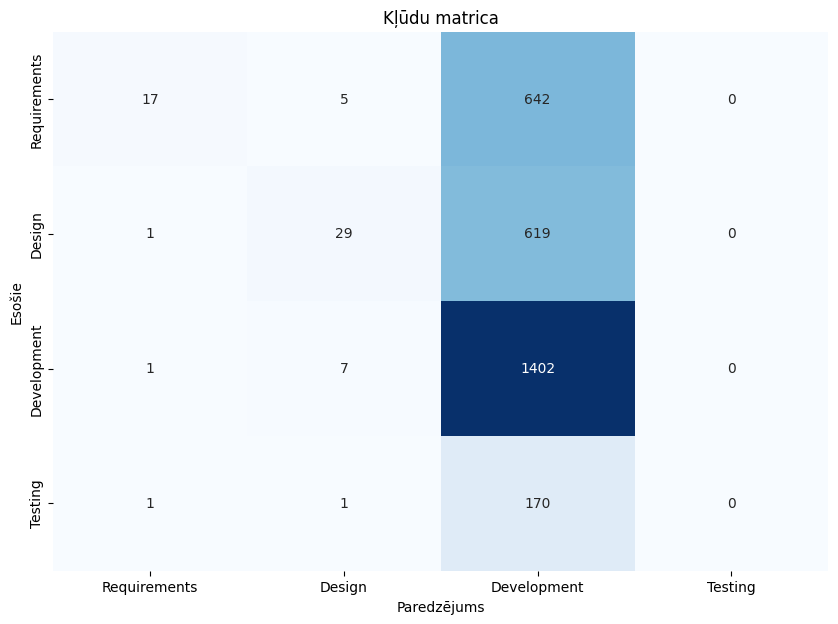

In [ ]:
# Vizualizējam rezultātus
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Pārveidojam kategorijas uz skaitļu vērtībām
categories = {
    'Requirements': 0,
    'Design': 1,
    'Development': 2,
    'Testing': 3
}

# Veidojma kļūdu matricu
plt.figure(figsize=(10, 7))
sns.heatmap(overall_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories.keys(), yticklabels=categories.keys(), cbar=False)

# Definējam nosaukumus
plt.xlabel('Paredzējums')
plt.ylabel('Esošie')
plt.title('Kļūdu matrica')
plt.show()

In [ ]:
# Paredzējums
def predictPhase(bugText):
  # Pārveidojam kategorijas uz skaitļu vērtībām
  categories = {
      'Requirements': 0,
      'Design': 1,
      'Development': 2,
      'Testing': 3
  }
  # Pārveidojam skaitļu vērtības uz teksta vērtībām
  reverse_categories = {v: k for k, v in categories.items()}

  vect = vectorizer.transform([bugText])
  prediction = classifier.predict(vect)
  return reverse_categories[prediction[0]]

defect_Description_for_prediction = 'database title column type must be changed to integer'

predict_phase = predictPhase(defect_Description_for_prediction)
print(f"Defekta apraksts '{defect_Description_for_prediction}' attiecas uz '{predict_phase}' fāzi.")

Defekta apraksts 'database title column type must be changed to integer' attiecas uz 'Development' fāzi.
